<a href="https://colab.research.google.com/github/nafisrahman006/AI/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True
import seaborn as sns # Another Plotting Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Salary_dataset.xlsx')
data.head()


,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [ ]:
 data.info(_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
 data.isnull().sum() # Null Value Counts
 

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

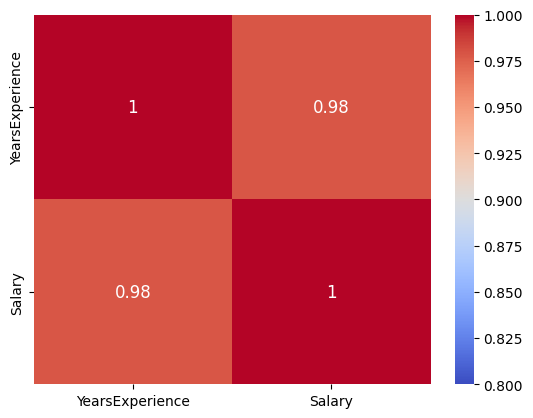

In [ ]:
plt.figure(1, dpi=100)
sns.heatmap(data.corr(), vmin=0.8, vmax=1, cmap = 'coolwarm', annot=True,annot_kws={"size": 12})

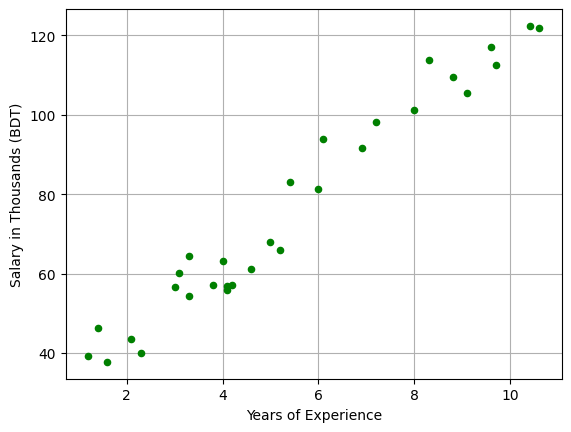

In [ ]:
plt.figure(4, dpi=100)
plt.scatter(data['YearsExperience'], data['Salary']/1000, color='green', s=20)
plt.ylabel('Salary in Thousands (BDT)')
plt.xlabel('Years of Experience')
plt.grid(); plt.show()



In [ ]:
x, y = data.to_numpy()[:,0], data.to_numpy()[:,1]
x = np.reshape(x, (-1,1))
y = np.reshape(y, (-1,1))

In [ ]:
# Seperating Train Test data from the Dataset randomly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
LR = LinearRegression()
reg_model = LR.fit(x_train, y_train)


In [ ]:
# Regression Coef and Intercept
reg_model.coef_, reg_model.intercept_

(array([[9438.93820772]]), array([25372.73520155]))

In [ ]:
reg_model.score(x_test, y_test)


0.9733032191213942

In [ ]:
y_pred = reg_model.predict(x_test)
print('Predicted Salary \t Actual Salary')
print('----------------- \t -------------')
for i in range(len(y_pred[:,0])):
  print(y_pred[:,0][i], '\t', y_test[:,0][i])

Predicted Salary 	 Actual Salary
----------------- 	 -------------
82006.36444787923 	 81364.0
90501.40883482859 	 91739.0
61240.700390891885 	 57190.0
125425.48020339818 	 121873.0
108435.39142949946 	 109432.0
65016.27567398049 	 57082.0


In [ ]:
# Prediction and Comparison
data['Predicted_Salary_LR'] = reg_model.predict(x)[:,0]
data['% Error (LR)'] = 100*abs(y[:,0] - reg_model.predict(x)[:,0])/y[:,0]
data

,YearsExperience,Salary,Predicted_Salary_LR,% Error (LR)
0,1.2,39344,36699.461051,6.721581
1,1.4,46206,38587.248692,16.488662
2,1.6,37732,40475.036334,7.269788
3,2.1,43526,45194.505438,3.833353
4,2.3,39892,47082.293079,18.024399
5,3.0,56643,53689.549825,5.214149
6,3.1,60151,54633.443645,9.172842
7,3.3,54446,56521.231287,3.811540
8,3.3,64446,56521.231287,12.296758
9,3.8,57190,61240.700391,7.082882


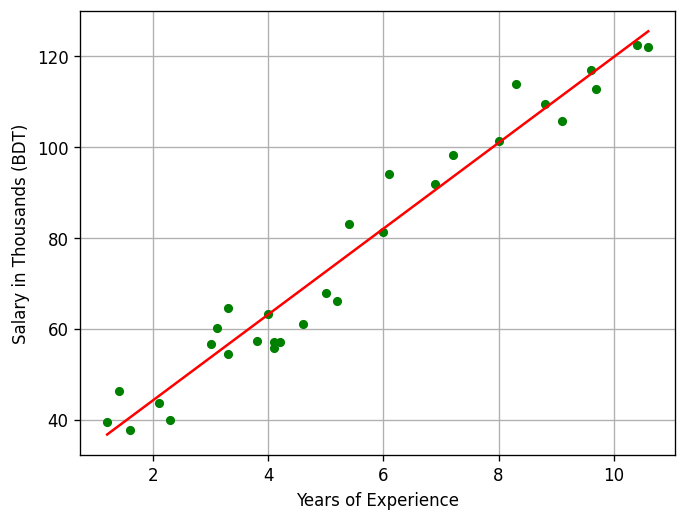

In [ ]:
# Plotting Predicted Data
plt.figure(3, dpi=120)
plt.scatter(x[:,0], y[:,0]/1000, color='green', s=20)
plt.plot(x[:,0], reg_model.predict(x)[:,0]/1000, color='red')
plt.ylabel('Salary in Thousands (BDT)')
plt.xlabel('Years of Experience')
plt.grid(); plt.show()


In [ ]:
RFR = RandomForestRegressor()
reg_model_2 = RFR.fit(x_train, np.ravel(y_train))
reg_model_2.score(x_test, np.ravel(y_test)) # R-sq score

0.9736047939354644

In [ ]:
y_pred = reg_model_2.predict(x_test)
print('Actual \t\t Predicted Salary')
print('-------- \t ----------------')
for i in range(len(y_pred)):
  print(y_test[:,0][i], '\t', y_pred[i])


Actual 		 Predicted Salary
-------- 	 ----------------
81364.0 	 87472.48
91739.0 	 97319.66
57190.0 	 61078.13533333333
121873.0 	 119339.36
109432.0 	 107474.78
57082.0 	 57228.124500000005


In [ ]:
data['Predicted_Salary_RFR'] = reg_model_2.predict(x)
data['% Error (RFR)'] = 100*abs(y[:,0] - reg_model_2.predict(x))/y[:,0]
data

,YearsExperience,Salary,Predicted_Salary_LR,% Error (LR),Predicted_Salary_RFR,% Error (RFR)
0,1.2,39344,36699.461051,6.721581,41294.100000,4.956537
1,1.4,46206,38587.248692,16.488662,44038.900000,4.690084
2,1.6,37732,40475.036334,7.269788,39713.460000,5.251405
3,2.1,43526,45194.505438,3.833353,42184.320000,3.082479
4,2.3,39892,47082.293079,18.024399,40934.810000,2.614083
5,3.0,56643,53689.549825,5.214149,57842.556667,2.117749
6,3.1,60151,54633.443645,9.172842,59035.276667,1.854871
7,3.3,54446,56521.231287,3.811540,59206.033333,8.742669
8,3.3,64446,56521.231287,12.296758,59206.033333,8.130786
9,3.8,57190,61240.700391,7.082882,61078.135333,6.798628


In [ ]:
data['% Error (LR)'].describe()


count    30.000000
mean      7.149750
std       5.263548
min       0.143172
25%       3.139063
50%       6.767101
75%      12.147474
max      18.024399
Name: % Error (LR), dtype: float64

In [ ]:
data['% Error (RFR)'].describe()



count    30.000000
mean      3.548953
std       2.507380
min       0.255991
25%       2.003558
50%       2.595222
75%       5.177688
max       8.742669
Name: % Error (RFR), dtype: float64

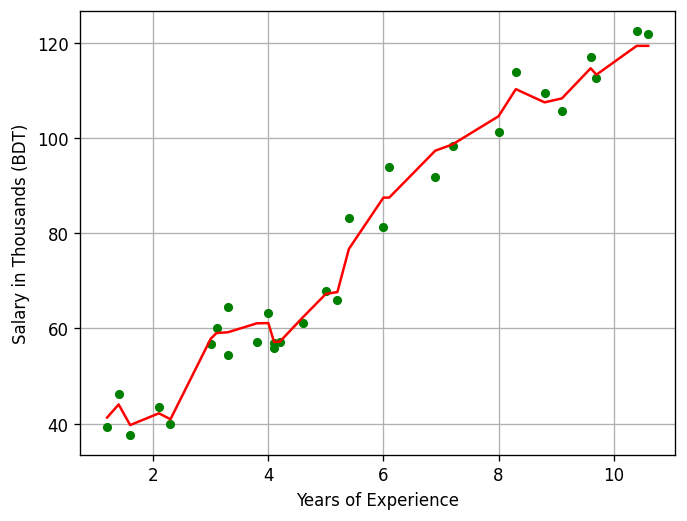

In [ ]:
 # Plotting Predicted Data
plt.figure(4, dpi=120)
plt.scatter(x[:,0], y[:,0]/1000, color='green', s=20)
plt.plot(x[:,0], reg_model_2.predict(x)/1000, color='red')
plt.ylabel('Salary in Thousands (BDT)')
plt.xlabel('Years of Experience')
plt.grid(); plt.show()

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/creditcard.xlsx')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df['Class'] = df['Class'].astype('category')

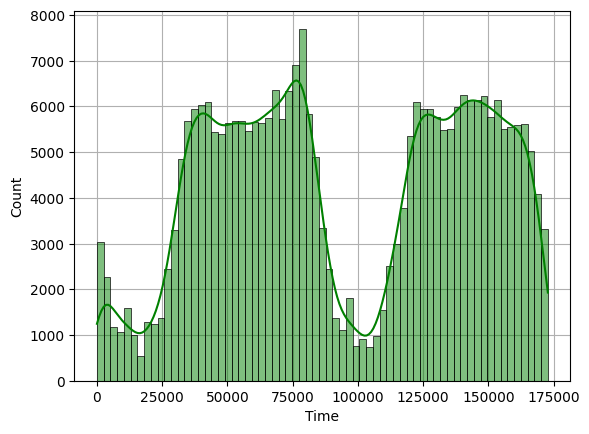

In [ ]:
# Time Distribution
plt.figure(dpi=100)
sns.histplot(data=df, x='Time', kde=True, color='green')
plt.grid(); plt.show()

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))


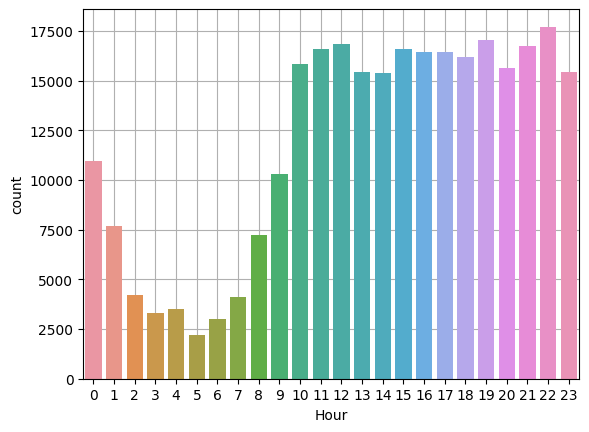

In [ ]:
plt.figure(dpi=100)
sns.countplot(data=df, x='Hour')
plt.grid(); plt.show()

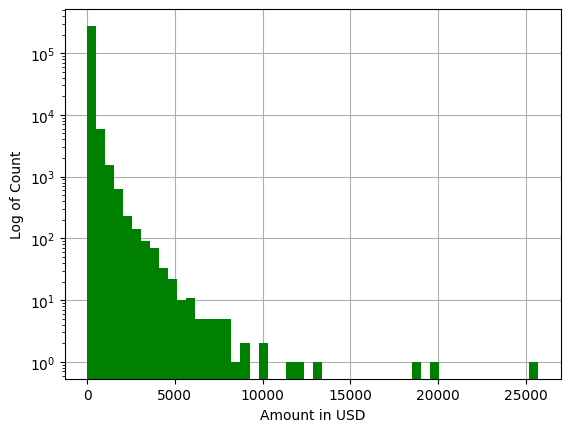

In [ ]:
plt.figure(dpi=100)
plt.hist(df.Amount, log=True, bins=50, color='green')
plt.xlabel('Amount in USD'); plt.ylabel('Log of Count')
plt.grid(); plt.show()


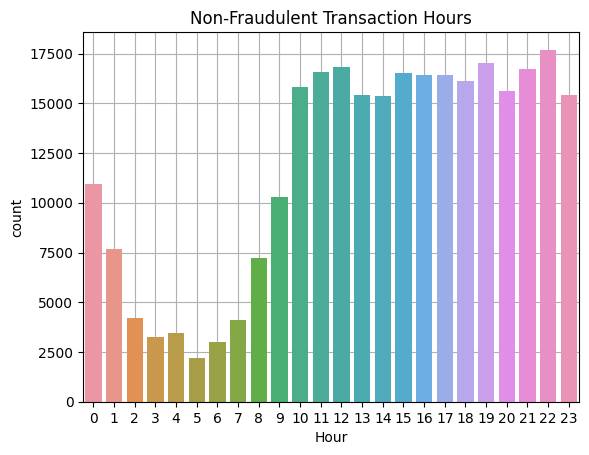

In [ ]:
# Hour vs Class: for Class 0
plt.figure(dpi=100)
sns.countplot(data=df[df.Class==0], x='Hour')
plt.title('Non-Fraudulent Transaction Hours')
plt.grid(); plt.show()

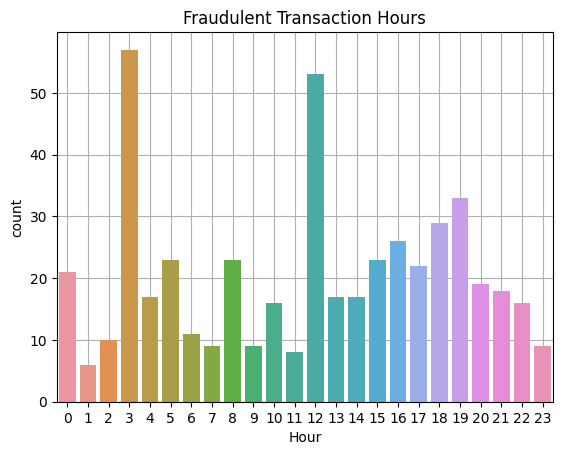

In [ ]:
# Hour vs Class: for Class 1
plt.figure(dpi=100)
sns.countplot(data=df[df.Class==1], x='Hour')
plt.title('Fraudulent Transaction Hours')
plt.grid(); plt.show()


In [ ]:
df.groupby('Class')['Hour'].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,14.128924,6.229159,0.0,10.0,15.0,19.0,23.0
1,492.0,11.621951,6.683975,0.0,5.0,12.0,18.0,23.0


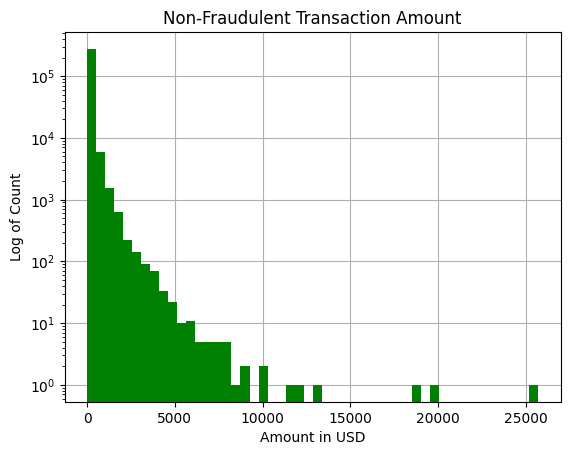

In [ ]:
# Amount vs Class: for Class 0
plt.figure(dpi=100)
plt.hist(df[df.Class==0].Amount, log=True, bins=50, color='green')
plt.xlabel('Amount in USD'); plt.ylabel('Log of Count')
plt.title('Non-Fraudulent Transaction Amount')
plt.grid(); plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

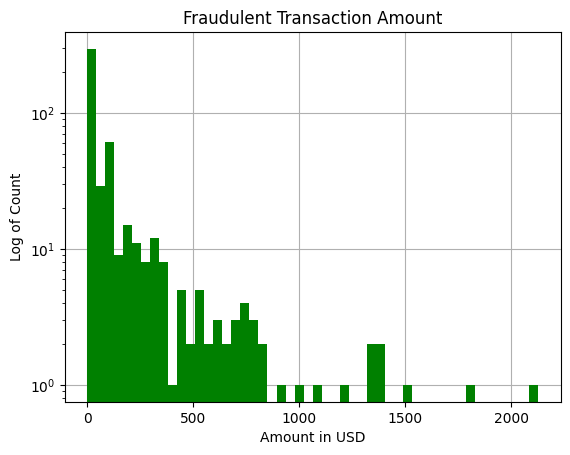

In [ ]:
plt.figure(dpi=100)
plt.hist(df[df.Class==1].Amount, log=True, bins=50, color='green')
plt.xlabel('Amount in USD'); plt.ylabel('Log of Count')
plt.title('Fraudulent Transaction Amount')
plt.grid(); plt.show

In [ ]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [ ]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [ ]:
 df = df.drop('Hour', axis=1)

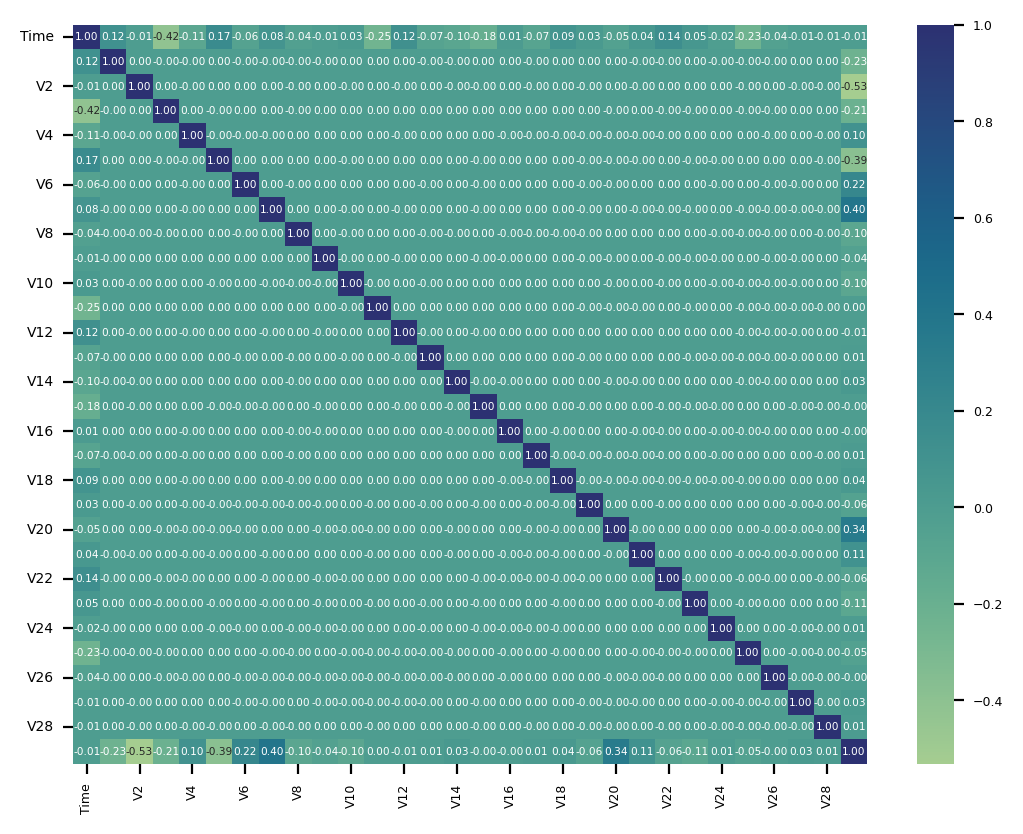

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(dpi=200)
ax = sns.heatmap(corr, cmap='crest', annot=True, fmt='.2f', annot_kws={'size': 3.8})
ax.figure.axes[-1].tick_params(labelsize=4.5)
plt.xticks(fontsize=4.5); plt.yticks(fontsize=5)
plt.grid(); plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df[['Time', 'Amount']] = std.fit_transform(df[['Time', 'Amount']])

<Axes: xlabel='Class', ylabel='count'>

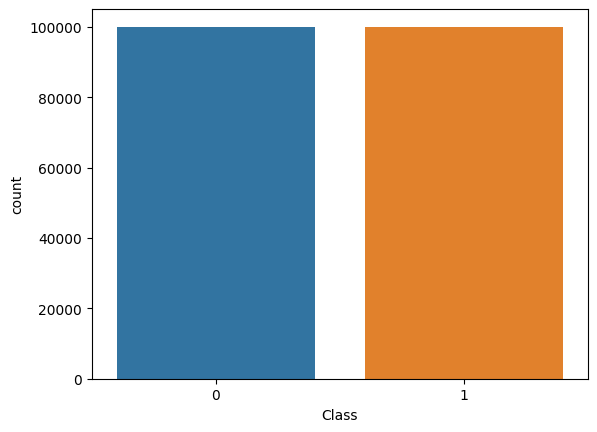

In [ ]:
# First install the 'imblearn' library using pip channel
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
sample_size = 100000
df_nonfraud = df[df.Class == 0].sample(sample_size, random_state=0)
df_fraud = df[df.Class == 1]
df_syn = pd.concat([df_nonfraud, df_fraud]).sample(frac=1, random_state=1)
X_syn = df_syn.drop('Class', axis=1)
y_syn = df_syn.Class
X_smote, y_smote = smote.fit_resample(X_syn, y_syn)
sns.countplot(x = y_smote)

In [ ]:
y_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedKFold,cross_validate
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score, accuracy_score, make_scorer
import time


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.25, random_state=1)


In [ ]:
# Decision Tree Classifier (DTC): Training
model_dtc = DecisionTreeClassifier()
start = time.time()
model_dtc = model_dtc.fit(x_train, y_train)
y_pred = model_dtc.predict(x_test)
training_time_dtc = time.time() - start
print('Training Time:', training_time_dtc, 'seconds')

Training Time: 15.340219259262085 seconds


In [ ]:
# Test Scores on this particular training
acc_dtc, f1_dtc = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
prc_dtc, rcl_dtc = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
acc_dtc, f1_dtc, prc_dtc, rcl_dtc

(0.99524, 0.9952128087537212, 0.9937736000642725, 0.9966561920876642)

In [ ]:
# Cross Validation of DTC Performance
scores = {
'precision': make_scorer(precision_score, average='weighted',zero_division=0),
'recall': make_scorer(recall_score, average='weighted', zero_division=0),
'f1': make_scorer(f1_score, average='weighted', zero_division=0),
'accuracy': make_scorer(accuracy_score)
}
cvf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=0)
perf_dtc = cross_validate(model_dtc, X_smote, y_smote, scoring=scores, cv=cvf)
perf_dtc

{'fit_time': array([13.1064136 , 10.17204118,  7.65422201,  8.1016047 ]),
 'score_time': array([0.10930252, 0.10921311, 0.17138505, 0.11245108]),
 'test_precision': array([0.99396396, 0.99341776, 0.99307143, 0.99335347]),
 'test_recall': array([0.99395, 0.99341, 0.99306, 0.99334]),
 'test_f1': array([0.99394989, 0.99341003, 0.9930599 , 0.99334002]),
 'test_accuracy': array([0.99395, 0.99341, 0.99306, 0.99334])}

In [ ]:
# Logistic Regression: Training
model_lr = LogisticRegression(max_iter=500)
start = time.time()
model_lr = model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
training_time_lr = time.time() - start
print('Training Time:', training_time_lr, 'seconds')

Training Time: 2.1076133251190186 seconds


In [ ]:
 # Test Scores on this particular training
acc_lr, f1_lr = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
prc_lr, rcl_lr = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
acc_lr, f1_lr, prc_lr, rcl_lr

(0.94798, 0.9461211807353703, 0.9737347034494521, 0.9200306180001612)

In [ ]:
# Cross Validation of LR Performance
perf_lr = cross_validate(model_lr, X_smote, y_smote, scoring=scores, cv=cvf)
perf_lr


{'fit_time': array([1.12184596, 1.55417347, 1.82991552, 1.58963227]),
 'score_time': array([0.16242313, 0.24882579, 0.24971271, 0.1572237 ]),
 'test_precision': array([0.94984967, 0.94960245, 0.94986365, 0.94970375]),
 'test_recall': array([0.94844, 0.94833, 0.94849, 0.94843]),
 'test_f1': array([0.94840571, 0.94828752, 0.94845613, 0.94838813]),
 'test_accuracy': array([0.94844, 0.94833, 0.94849, 0.94843])}

In [ ]:
# Support Vector Classifier (SVC): Training
 # Support Vector Classifier (SVC): Training
model_svc = SVC(random_state=0)
start = time.time()
model_svc = model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)
training_time_svc = time.time() - start
print('Training Time:', training_time_svc, 'seconds')

Training Time: 384.64494276046753 seconds


In [ ]:
# Test Scores on this particular training
acc_svc, f1_svc = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
prc_svc, rcl_svc = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
acc_svc, f1_svc, prc_svc, rcl_svc

(0.96968, 0.9689814625363179, 0.9844919341426909, 0.953952139231327)

In [ ]:
# Cross Validation of SVC Performance
perf_svc = cross_validate(model_svc, X_smote, y_smote, scoring=scores, cv=cvf)
perf_svc

{'fit_time': array([106.43947363, 258.34661198, 269.84516716, 289.67447877]),
 'score_time': array([107.07182503, 114.16502476, 113.8249023 , 115.1144197 ]),
 'test_precision': array([0.96747067, 0.96615979, 0.96663257, 0.96665124]),
 'test_recall': array([0.96685, 0.96553, 0.96599, 0.96604]),
 'test_f1': array([0.96684151, 0.96551569, 0.96598067, 0.96602654]),
 'test_accuracy': array([0.96685, 0.96553, 0.96599, 0.96604])}

In [ ]:
# Random Forest Classifier (RFC): Training
model_rfc = RandomForestClassifier()
start = time.time()
model_rfc = model_rfc.fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)
training_time_rfc = time.time() - start
print('Training Time:', training_time_rfc, 'seconds')

Training Time: 119.04286623001099 seconds


In [ ]:
# Test Scores on this particular training
acc_rfc, f1_rfc = accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
prc_rfc, rcl_rfc = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
acc_rfc, f1_rfc, prc_rfc, rcl_rfc

(0.99984, 0.9998388721047332, 0.9997180602545513, 0.9999597131576827)

In [ ]:
# Cross Validation of RFC Performance
perf_rfc = cross_validate(model_rfc, X_smote, y_smote, scoring=scores, cv=cvf)
perf_rfc

{'fit_time': array([68.87471151, 69.30798554, 68.91488862, 67.46086431]),
 'score_time': array([1.20152068, 1.1956923 , 1.19283247, 1.20456743]),
 'test_precision': array([0.99936   , 0.99937003, 0.99950003, 0.9994    ]),
 'test_recall': array([0.99936, 0.99937, 0.9995 , 0.9994 ]),
 'test_f1': array([0.99936, 0.99937, 0.9995 , 0.9994 ]),
 'test_accuracy': array([0.99936, 0.99937, 0.9995 , 0.9994 ])}

In [ ]:
comp_models = pd.DataFrame()
comp_models['Model'] = ['DTC', 'LR', 'RFC', 'SVC']
avg_fit_time_rfc = np.mean(list(perf_rfc.items())[0][1])
avg_fit_time_svc = np.mean(list(perf_svc.items())[0][1])
avg_fit_time_dtc = np.mean(list(perf_dtc.items())[0][1])
avg_fit_time_lr = np.mean(list(perf_lr.items())[0][1])
avg_score_time_rfc = np.mean(list(perf_rfc.items())[1][1])
avg_score_time_svc = np.mean(list(perf_svc.items())[1][1])
avg_score_time_dtc = np.mean(list(perf_dtc.items())[1][1])
avg_score_time_lr = np.mean(list(perf_lr.items())[1][1])
avg_prc_rfc = np.mean(list(perf_rfc.items())[2][1])*100
avg_prc_svc = np.mean(list(perf_svc.items())[2][1])*100
avg_prc_dtc = np.mean(list(perf_dtc.items())[2][1])*100
avg_prc_lr = np.mean(list(perf_lr.items())[2][1])*100
avg_rcl_rfc = np.mean(list(perf_rfc.items())[3][1])*100
avg_rcl_svc = np.mean(list(perf_svc.items())[3][1])*100
avg_rcl_dtc = np.mean(list(perf_dtc.items())[3][1])*100
avg_rcl_lr = np.mean(list(perf_lr.items())[3][1])*100
avg_f1_rfc = np.mean(list(perf_rfc.items())[4][1])*100
avg_f1_svc = np.mean(list(perf_svc.items())[4][1])*100
avg_f1_dtc = np.mean(list(perf_dtc.items())[4][1])*100
avg_f1_lr = np.mean(list(perf_lr.items())[4][1])*100
avg_ac_rfc = np.mean(list(perf_rfc.items())[5][1])*100
avg_ac_svc = np.mean(list(perf_svc.items())[5][1])*100
avg_ac_dtc = np.mean(list(perf_dtc.items())[5][1])*100
avg_ac_lr = np.mean(list(perf_lr.items())[5][1])*100
comp_models['Train Time (sec)'] = [avg_fit_time_dtc, avg_fit_time_lr,avg_fit_time_rfc, avg_fit_time_svc]
comp_models['Test Time (sec)'] = [avg_score_time_dtc, avg_score_time_lr,avg_score_time_rfc, avg_score_time_svc]
comp_models['Precision (%)'] = [avg_prc_dtc, avg_prc_lr, avg_prc_rfc,avg_prc_svc]
comp_models['Recall (%)'] = [avg_rcl_dtc, avg_rcl_lr, avg_rcl_rfc, avg_rcl_svc]
comp_models['F1 Score (%)'] = [avg_f1_dtc, avg_f1_lr, avg_f1_rfc, avg_f1_svc]
comp_models['Accuracy (%)'] = [avg_ac_dtc, avg_ac_lr, avg_ac_rfc, avg_ac_svc]
comp_models['Mean Accuracy (%)'] = comp_models.iloc[:,3:].mean(axis=1)
comp_models = comp_models.sort_values('Mean Accuracy (%)', ascending=False)
comp_models

,Model,Train Time (sec),Test Time (sec),Precision (%),Recall (%),F1 Score (%),Accuracy (%),Mean Accuracy (%)
2,RFC,68.639612,1.198653,99.940752,99.94075,99.940750,99.94075,99.940750
0,DTC,9.758570,0.125588,99.345165,99.34400,99.343996,99.34400,99.344290
3,SVC,231.076433,112.544043,96.672857,96.61025,96.609110,96.61025,96.625617
1,LR,1.523892,0.204546,94.975488,94.84225,94.838437,94.84225,94.874606


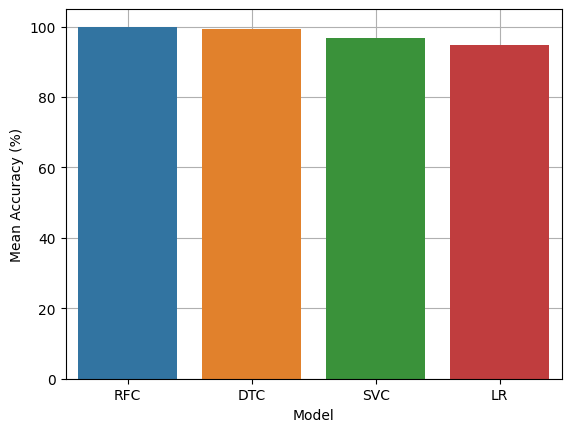

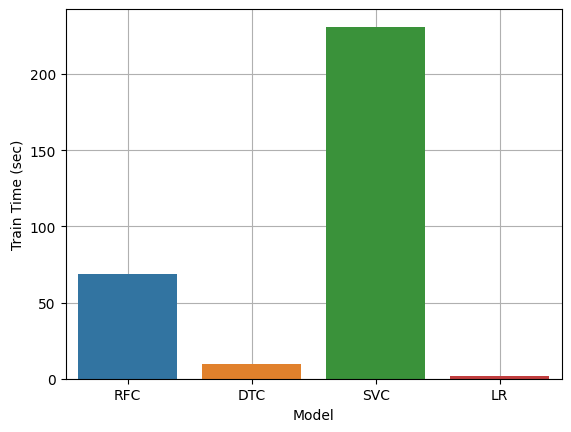

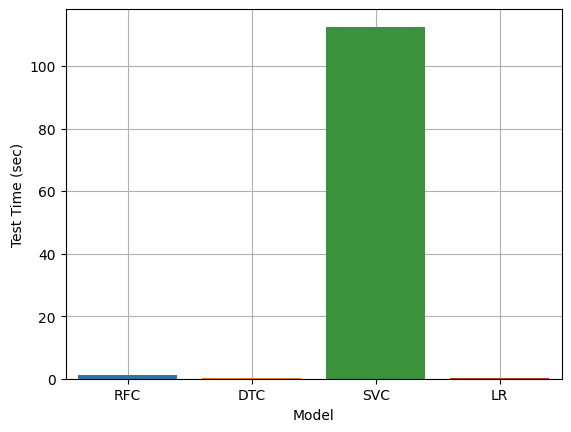

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=comp_models, x='Model', y='Mean Accuracy (%)')
plt.grid(); plt.show()
plt.figure(dpi=100)
sns.barplot(data=comp_models, x='Model', y='Train Time (sec)')
plt.grid(); plt.show()
plt.figure(dpi=100)
sns.barplot(data=comp_models, x='Model', y='Test Time (sec)')
plt.grid(); plt.show()


In [ ]:
!pip install pandoc
import pandoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html/content/Google_colab+lab6.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr